In [4]:
# 1.0 Importing libraries
import numpy as np

# 1.1   For transforming categorical data to integer and to dummy
from pyspark.ml.feature import  StringIndexer, OneHotEncoder

# 1.2   For collecting all features at one place
#       A feature transformer that merges multiple columns into one vector column.
from pyspark.ml.feature import VectorAssembler

# 1.3 Minmax scaler
from pyspark.ml.feature import MinMaxScaler, StandardScaler

# 1.4   To execute all transformation operations as pipeline
from pyspark.ml import Pipeline

# 1.5 Logistic Regression modeling
from pyspark.ml.classification import LogisticRegression

# 1.6 Parameter grid builder and cross-validator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# 1.7 Evaluate classification. Default AUC.
#     Change parameter 'metricName' for others
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 1.8 Misc
import time


In [2]:
pip install xgboost

In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd  

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# File Transfer

In [5]:
# B. Transfer requisite files to hdfs after making a new folder

"""


cd ~
hdfs dfs -rm -r  /user/ashok/data_files/Book6
hdfs dfs -mkdir -p /user/ashok/data_files/Book6
hdfs dfs -put /home/ashok/Documents/spark/1.basics/Book6.csv /user/ashok/data_files/Book6
hdfs dfs -cat /user/ashok/data_files/Book6




"""



'\n\n\ncd ~\nhdfs dfs -rm -r  /user/ashok/data_files/Book6\nhdfs dfs -mkdir -p /user/ashok/data_files/Book6\nhdfs dfs -put /home/ashok/Documents/spark/1.basics/Book6.csv /user/ashok/data_files/Book6\nhdfs dfs -cat /user/ashok/data_files/Book6\n\n\n\n\n'

In [6]:


from pyspark.sql.functions import col

In [7]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession


In [8]:
## C. And then open pyspark, 
! pip install pyspark


In [9]:
# D. pyspark configuration UI is avaialble at following URL:

"""
	 http://localhost:4040
            
            
	 Check for parameters (under 'Environment'  tab) such as:
	 	spark.master
	 	spark.driver.host
	 	spark.driver.memory

	In local mode there is one jvm for both excutors and drivers
    
"""    

"\n\t http://localhost:4040\n            \n            \n\t Check for parameters (under 'Environment'  tab) such as:\n\t \tspark.master\n\t \tspark.driver.host\n\t \tspark.driver.memory\n\n\tIn local mode there is one jvm for both excutors and drivers\n    \n"

In [10]:
#  Read data
#   Read the "easy visa process" dataset from spark-sql store ( "easy visa process"  database)
#      And return the data as a spark DataFrame


# Minimum:

URL_of_file = "hdfs://localhost:9000/user/ashok/data_files/Book6/"
df = spark.read.csv(
                                        path = URL_of_file + "Book6.csv",
                                        header = True,
                                        inferSchema= True,
					sep = "," ,                           			 # Can be any character
				       dateFormat = "yyyy-mm-dd"
)

# 2.0.1
df.show(2)
df.dtypes
df.schema


+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|case_id|continent|education_of_employee|has_job_experience|requires_job_training|no_of_employees|yr_of_estab|region_of_employment|prevailing_wage|unit_of_wage|full_time_position|case_status|
+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
| EZYV01|     Asia|          High School|                 N|                    N|          14513|       2007|                West|       592.2029|        Hour|                 Y|     Denied|
| EZYV02|     Asia|             Master's|                 Y|                    N|           2412|       2002|           Northeast|       83425.65|        Year|                 Y|  Certified|
+-------+---------+---------------------

StructType([StructField('case_id', StringType(), True), StructField('continent', StringType(), True), StructField('education_of_employee', StringType(), True), StructField('has_job_experience', StringType(), True), StructField('requires_job_training', StringType(), True), StructField('no_of_employees', IntegerType(), True), StructField('yr_of_estab', IntegerType(), True), StructField('region_of_employment', StringType(), True), StructField('prevailing_wage', DoubleType(), True), StructField('unit_of_wage', StringType(), True), StructField('full_time_position', StringType(), True), StructField('case_status', StringType(), True)])

In [5]:
data=pd.read_csv("EasyVisa.csv")


In [11]:
#  Display multiple command outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
#Increase display width of notebook:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3288/3743344407.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:

print("\n-----Schema----")
df.printSchema()
print("\n-----Data types----")
print(df.dtypes)


-----Schema----
root
 |-- case_id: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- education_of_employee: string (nullable = true)
 |-- has_job_experience: string (nullable = true)
 |-- requires_job_training: string (nullable = true)
 |-- no_of_employees: integer (nullable = true)
 |-- yr_of_estab: integer (nullable = true)
 |-- region_of_employment: string (nullable = true)
 |-- prevailing_wage: double (nullable = true)
 |-- unit_of_wage: string (nullable = true)
 |-- full_time_position: string (nullable = true)
 |-- case_status: string (nullable = true)


-----Data types----
[('case_id', 'string'), ('continent', 'string'), ('education_of_employee', 'string'), ('has_job_experience', 'string'), ('requires_job_training', 'string'), ('no_of_employees', 'int'), ('yr_of_estab', 'int'), ('region_of_employment', 'string'), ('prevailing_wage', 'double'), ('unit_of_wage', 'string'), ('full_time_position', 'string'), ('case_status', 'string')]


In [14]:
#  take() is same as head()
#     Both return a list or Row types

df.head(3)
df.take(3)

[Row(case_id='EZYV01', continent='Asia', education_of_employee='High School', has_job_experience='N', requires_job_training='N', no_of_employees=14513, yr_of_estab=2007, region_of_employment='West', prevailing_wage=592.2029, unit_of_wage='Hour', full_time_position='Y', case_status='Denied'),
 Row(case_id='EZYV02', continent='Asia', education_of_employee="Master's", has_job_experience='Y', requires_job_training='N', no_of_employees=2412, yr_of_estab=2002, region_of_employment='Northeast', prevailing_wage=83425.65, unit_of_wage='Year', full_time_position='Y', case_status='Certified'),
 Row(case_id='EZYV03', continent='Asia', education_of_employee="Bachelor's", has_job_experience='N', requires_job_training='Y', no_of_employees=44444, yr_of_estab=2008, region_of_employment='West', prevailing_wage=122996.86, unit_of_wage='Year', full_time_position='Y', case_status='Denied')]

[Row(case_id='EZYV01', continent='Asia', education_of_employee='High School', has_job_experience='N', requires_job_training='N', no_of_employees=14513, yr_of_estab=2007, region_of_employment='West', prevailing_wage=592.2029, unit_of_wage='Hour', full_time_position='Y', case_status='Denied'),
 Row(case_id='EZYV02', continent='Asia', education_of_employee="Master's", has_job_experience='Y', requires_job_training='N', no_of_employees=2412, yr_of_estab=2002, region_of_employment='Northeast', prevailing_wage=83425.65, unit_of_wage='Year', full_time_position='Y', case_status='Certified'),
 Row(case_id='EZYV03', continent='Asia', education_of_employee="Bachelor's", has_job_experience='N', requires_job_training='Y', no_of_employees=44444, yr_of_estab=2008, region_of_employment='West', prevailing_wage=122996.86, unit_of_wage='Year', full_time_position='Y', case_status='Denied')]

In [15]:
#  Target columns values:

df.select('case_status').show(4)

+-----------+
|case_status|
+-----------+
|     Denied|
|  Certified|
|     Denied|
|     Denied|
+-----------+
only showing top 4 rows



In [16]:
#  How many rows are there?
#     Output is a scalar and NOT DataFrame

df.count()      # 25480

25480

In [17]:
#  Value counts of target

dx = df.groupby('continent').count()
dx.show()


+-------------+-----+
|    continent|count|
+-------------+-----+
|       Europe| 3732|
|       Africa|  551|
|North America| 3292|
|South America|  852|
|      Oceania|  192|
|         Asia|16861|
+-------------+-----+



In [18]:
#  Descibe a summary of dataframe
#     or specific columns
#     Similar to pandas method

df.describe().show()   
print()

+-------+--------+-------------+---------------------+------------------+---------------------+------------------+------------------+--------------------+------------------+------------+------------------+-----------+
|summary| case_id|    continent|education_of_employee|has_job_experience|requires_job_training|   no_of_employees|       yr_of_estab|region_of_employment|   prevailing_wage|unit_of_wage|full_time_position|case_status|
+-------+--------+-------------+---------------------+------------------+---------------------+------------------+------------------+--------------------+------------------+------------+------------------+-----------+
|  count|   25480|        25480|                25480|             25480|                25480|             25480|             25480|               25480|             25480|       25480|             25480|      25480|
|   mean|    null|         null|                 null|              null|                 null| 5667.043210361067| 1979.40992935

In [19]:
df.describe(['prevailing_wage', 'no_of_employees']).show()

+-------+------------------+------------------+
|summary|   prevailing_wage|   no_of_employees|
+-------+------------------+------------------+
|  count|             25480|             25480|
|   mean| 74455.81459209221| 5667.043210361067|
| stddev|52815.942326873504|22877.928847734496|
|    min|            2.1367|               -26|
|    max|         319210.27|            602069|
+-------+------------------+------------------+



In [20]:
#  Filter for case_status of "No. of Employees" and age > 21

df.filter(df["case_status"]=="Denied").take(1)   
df.filter((df["case_status"] == "Denied") & (df["no_of_employees"] > 5000) ).take(1)   # use '&' '|'  '~' for 'not'

[Row(case_id='EZYV01', continent='Asia', education_of_employee='High School', has_job_experience='N', requires_job_training='N', no_of_employees=14513, yr_of_estab=2007, region_of_employment='West', prevailing_wage=592.2029, unit_of_wage='Hour', full_time_position='Y', case_status='Denied')]

[Row(case_id='EZYV01', continent='Asia', education_of_employee='High School', has_job_experience='N', requires_job_training='N', no_of_employees=14513, yr_of_estab=2007, region_of_employment='West', prevailing_wage=592.2029, unit_of_wage='Hour', full_time_position='Y', case_status='Denied')]

# correlation

In [23]:

df.corr('no_of_employees', 'prevailing_wage')

-0.00952251836672775

## Visualization

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [7]:
#Observations on number_of_employees

#Removing negative entries for no_of_employees
data.drop(data[(data["no_of_employees"]<=0)].index, inplace=True)

In [8]:
data.shape


(25447, 12)

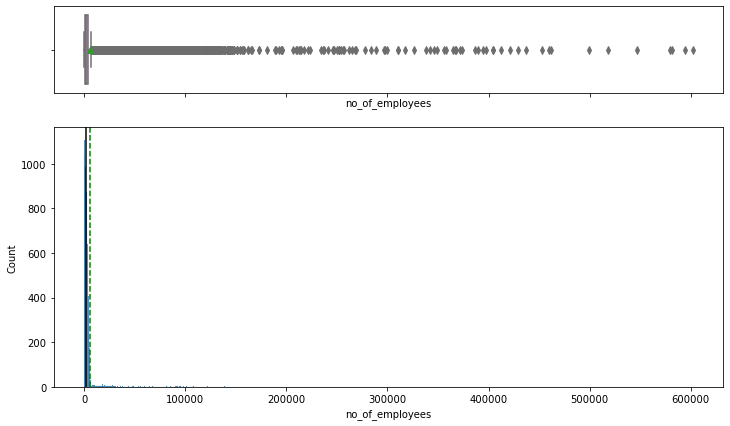

In [9]:
histogram_boxplot(data, "no_of_employees")


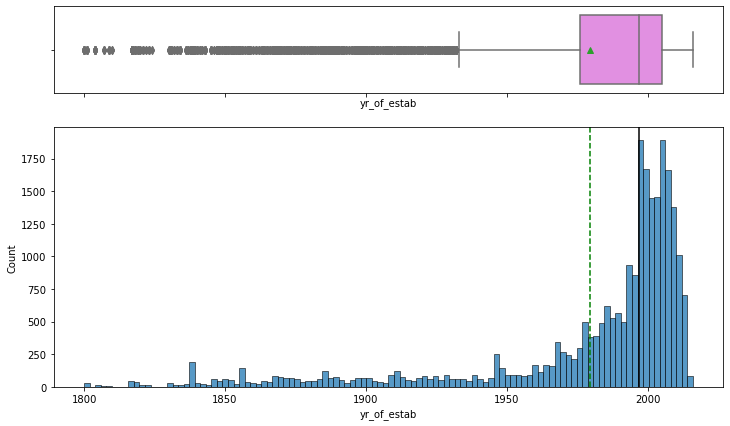

In [10]:
#Observations on year_of_establishment
histogram_boxplot(data, "yr_of_estab")


In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

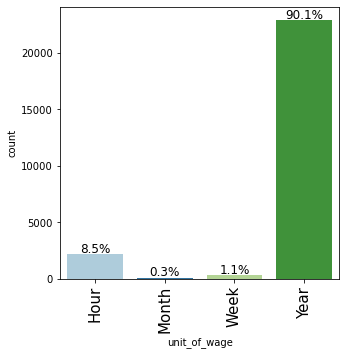

In [12]:
labeled_barplot(data, "unit_of_wage", perc=True);


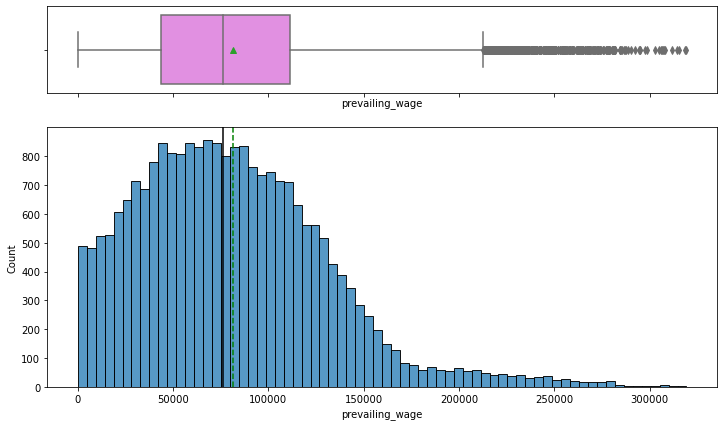

In [13]:
#Observations specifically on data where unit_of_wage is yearly
histogram_boxplot(data[(data["unit_of_wage"]=="Year")], "prevailing_wage")


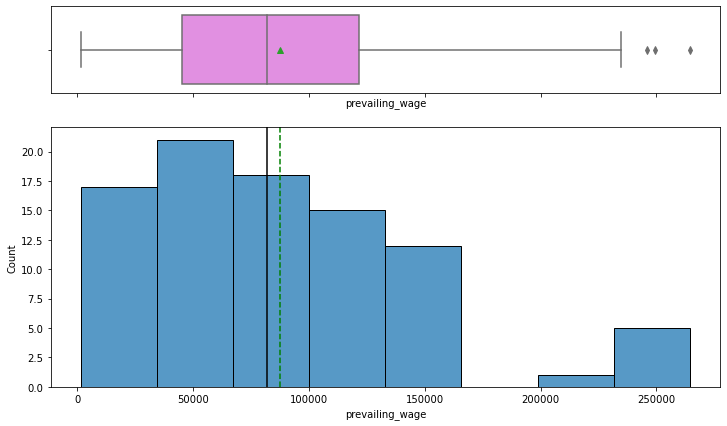

In [14]:
#Observations specifically on data where unit_of_wage is weekly or monthly
histogram_boxplot(data[(data["unit_of_wage"]=="Month")], "prevailing_wage")


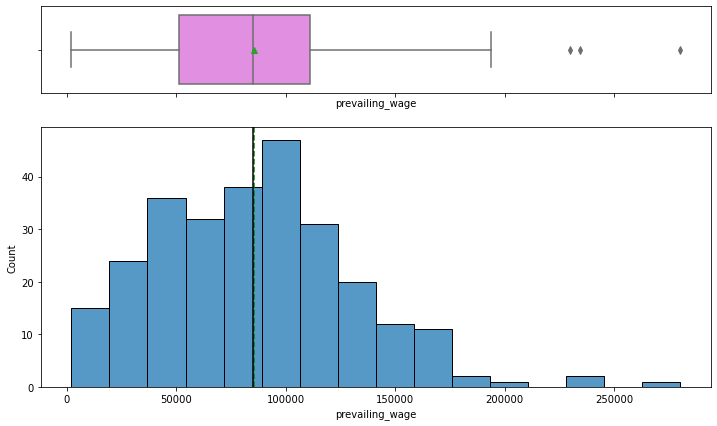

In [15]:
histogram_boxplot(data[(data["unit_of_wage"]=="Week")], "prevailing_wage")


In [16]:
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"] = \
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"]*52
# assuming 52 paid weeks per year


In [17]:
data["unit_of_wage"] = data["unit_of_wage"].astype('object')
data.loc[data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
data.loc[data["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
data["unit_of_wage"] = data["unit_of_wage"].astype('category')

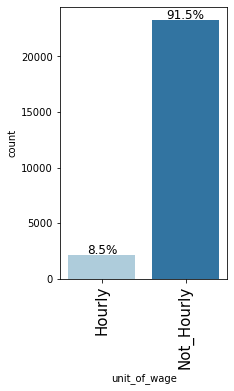

In [18]:
labeled_barplot(data, "unit_of_wage", perc=True)


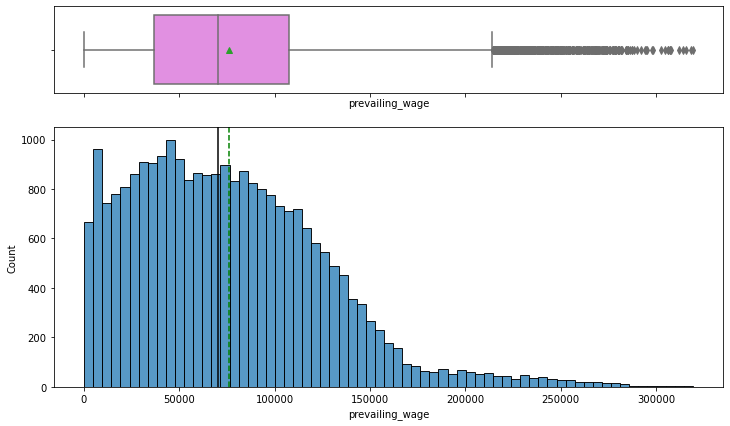

In [19]:
histogram_boxplot(data, "prevailing_wage")


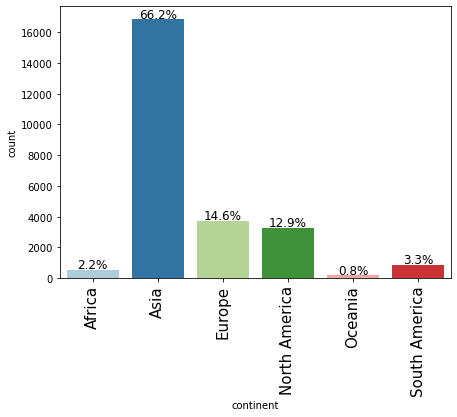

In [20]:
#Observations on continent
labeled_barplot(data, "continent", perc=True)


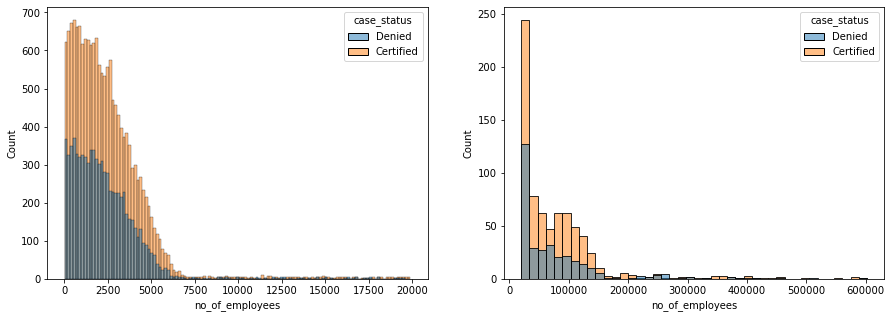

In [21]:
#number of employees and case status
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data[data["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=data[data["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

# Null Values

In [1]:
from pyspark.sql.functions import isnan, when, count, col
def null_values(data):
 data.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in data.columns]).show()    
    


ModuleNotFoundError: No module named 'pyspark'

In [25]:
null_values(df)

+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|case_id|continent|education_of_employee|has_job_experience|requires_job_training|no_of_employees|yr_of_estab|region_of_employment|prevailing_wage|unit_of_wage|full_time_position|case_status|
+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+
|      0|        0|                    0|                 0|                    0|              0|          0|                   0|              0|           0|                 0|          0|
+-------+---------+---------------------+------------------+---------------------+---------------+-----------+--------------------+---------------+------------+------------------+-----------+



In [26]:
#  Prepare a list of categorical columns (eight)

x = df.dtypes
print()
print(x)
print()
print()



cat_cols= [ c[0]  for c in x if c[1] == "string" ]


print(cat_cols) 


len(cat_cols)    


[('case_id', 'string'), ('continent', 'string'), ('education_of_employee', 'string'), ('has_job_experience', 'string'), ('requires_job_training', 'string'), ('no_of_employees', 'int'), ('yr_of_estab', 'int'), ('region_of_employment', 'string'), ('prevailing_wage', 'double'), ('unit_of_wage', 'string'), ('full_time_position', 'string'), ('case_status', 'string')]


['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


9

In [27]:
# We will exclude the target, case_status , from here

cat_cols= cat_cols[0:8]

In [28]:
# Get remaining list of numerical columns

num_cols = [ i[0]   for i in df.dtypes  if i[1] != "string" ]
print(num_cols)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [29]:
#  After String indexing, names of our
#        cat_columns would be:

cat_cols_si = [c+"_index"  for c in cat_cols]

print(cat_cols_si)

['case_id_index', 'continent_index', 'education_of_employee_index', 'has_job_experience_index', 'requires_job_training_index', 'region_of_employment_index', 'unit_of_wage_index', 'full_time_position_index']


In [30]:
#  We will name our OHE columns, as:

ohe_cols = [ c + "_ohe"   for  c  in cat_cols ]
print(ohe_cols)

['case_id_ohe', 'continent_ohe', 'education_of_employee_ohe', 'has_job_experience_ohe', 'requires_job_training_ohe', 'region_of_employment_ohe', 'unit_of_wage_ohe', 'full_time_position_ohe']


In [31]:
# Getting mode of a feature--step-by-step

df.groupby('continent').count().show(3)
df.groupby('continent').count().orderBy("count").show(3)
df.groupby('continent').count().orderBy("count",ascending = False).show(3)
df.groupby('continent').count().orderBy("count",ascending = False).first()     # Print first Row

#  Row object:
df.groupby('continent').count().orderBy("count",ascending = False).first()['continent'] # Access values as dict values
df.groupby('continent').count().orderBy("count",ascending = False).first().continent    # Access values like attributes
df.groupby('continent').count().orderBy("count",ascending = False).first()[0]           # Row object behaves as a dict

+-------------+-----+
|    continent|count|
+-------------+-----+
|       Europe| 3732|
|       Africa|  551|
|North America| 3292|
+-------------+-----+
only showing top 3 rows

+-------------+-----+
|    continent|count|
+-------------+-----+
|      Oceania|  192|
|       Africa|  551|
|South America|  852|
+-------------+-----+
only showing top 3 rows

+-------------+-----+
|    continent|count|
+-------------+-----+
|         Asia|16861|
|       Europe| 3732|
|North America| 3292|
+-------------+-----+
only showing top 3 rows



Row(continent='Asia', count=16861)

'Asia'

'Asia'

'Asia'

In [32]:
# Find mode of each column
# Refer: https://stackoverflow.com/a/58279672


[[i,df.groupby(i).count().orderBy("count", ascending=False).first()[0]] for i in df.columns]

[['case_id', 'EZYV888'],
 ['continent', 'Asia'],
 ['education_of_employee', "Bachelor's"],
 ['has_job_experience', 'Y'],
 ['requires_job_training', 'N'],
 ['no_of_employees', 183],
 ['yr_of_estab', 1998],
 ['region_of_employment', 'Northeast'],
 ['prevailing_wage', 138.76],
 ['unit_of_wage', 'Year'],
 ['full_time_position', 'Y'],
 ['case_status', 'Certified']]

# String to label

In [33]:
 #Separately we will add another stage to convert target, income,
#         into 'label' indices using the StringIndexer.
#         We will not OneHotEncode  'label'

label_To_integer = StringIndexer(
                                   inputCol = "case_status",
                                   outputCol = "label"
                                 )


model = label_To_integer.fit(df.select("case_status"))
model.transform(df.select('case_status')).take(10)

[Row(case_status='Denied', label=1.0),
 Row(case_status='Certified', label=0.0),
 Row(case_status='Denied', label=1.0),
 Row(case_status='Denied', label=1.0),
 Row(case_status='Certified', label=0.0),
 Row(case_status='Certified', label=0.0),
 Row(case_status='Certified', label=0.0),
 Row(case_status='Denied', label=1.0),
 Row(case_status='Certified', label=0.0),
 Row(case_status='Certified', label=0.0)]

# Pipeline
data --> stringIndex target --> stringIndex cat_columns --> ohe cat_columns -->  assemble all --> standardise numeric features 

In [34]:
#libraries onceagain
# Ref: https://spark.apache.org/docs/latest/ml-features.html#extracting-transforming-and-selecting-features
#      https://spark.apache.org/docs/latest/ml-classification-regression.html  
#      https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegression.html


from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [35]:
#  In building Pipeline,
#      keyword 'stages' is a must

pipe = Pipeline(
                stages =  [
                            #  StringIndex target
                            StringIndexer(
                                           inputCol ="case_status",
                                           outputCol = "label"
                                           ),

                             # StringIndex all categorical cols
                             StringIndexer(
                                          inputCols = cat_cols,
                                          outputCols = cat_cols_si
                                         ),
                    
                             # OHE, StringIndexed columns
                             OneHotEncoder(
                                           inputCols = cat_cols_si,
                                           outputCols = ohe_cols
                                          ),
                    
                              #  Assemble OHE + num_cols
                              VectorAssembler
                                           (
                                           inputCols = ohe_cols + num_cols,
                                           outputCol = 'ass_features'    

                                           ),
                             
                             # Scale 'vector' column
                             StandardScaler(
                                            inputCol = 'ass_features',
                                            outputCol = 'features'

                                           )
                     
                       ]

            )

In [36]:
# Get transformed data: 
model= pipe.fit(df)


df_trans = model.transform(df)

22/10/04 22:39:22 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


22/10/04 22:39:25 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


In [37]:

print(df_trans.columns)


len(df.columns)         # 15
len(df_trans.columns)   # 34

['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status', 'label', 'case_id_index', 'continent_index', 'education_of_employee_index', 'has_job_experience_index', 'requires_job_training_index', 'region_of_employment_index', 'unit_of_wage_index', 'full_time_position_index', 'case_id_ohe', 'continent_ohe', 'education_of_employee_ohe', 'has_job_experience_ohe', 'requires_job_training_ohe', 'region_of_employment_ohe', 'unit_of_wage_ohe', 'full_time_position_ohe', 'ass_features', 'features']


12

31

# Pipeline with Estimator

In [38]:
#  In building Pipeline,
#      keyword 'stages' is a must

pipe = Pipeline(
                stages =  [
                            #  StringIndex target
                            StringIndexer(
                                           inputCol ="case_status",
                                           handleInvalid = 'keep',
                                           outputCol = "label"
                                           ),

                             #  StringIndex all categorical cols
                             StringIndexer(
                                          inputCols = cat_cols,
                                          handleInvalid = 'keep',
                                          outputCols = cat_cols_si
                                         ),
                    
                             #  OHE, StringIndexed columns
                             OneHotEncoder(
                                           inputCols = cat_cols_si,
                                           outputCols = ohe_cols
                                          ),
                    
                              #  Assemble OHE + num_cols
                              VectorAssembler
                                           (
                                           inputCols = ohe_cols + num_cols,
                                           outputCol = 'ass_features'    

                                           ),
                             
                             #  Scale 'vector' column
                             StandardScaler(
                                            inputCol = 'ass_features',
                                            outputCol = 'features'
                                           ),
                            
                             #  Modeling
                             # https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.classification.LogisticRegression
                             LogisticRegression(
                                 
                                                 featuresCol='features',
                                                 labelCol='label',
                                                 maxIter=30
                                               )
                    
                       ]

            )

# Split data and perform modeling

In [39]:
#  train/test split
train, test = df.randomSplit([0.8, 0.2], seed=12345)

In [40]:
#  Data size
train.count() 

20272

In [41]:
#  train the model

start = time.time()
lrModel = pipe.fit(train)
end = time.time()
(end-start)/60

22/10/04 22:39:32 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


22/10/04 22:39:33 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


22/10/04 22:39:34 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB


22/10/04 22:39:37 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB


22/10/04 22:39:39 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/10/04 22:39:39 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


22/10/04 22:39:39 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/10/04 22:39:39 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
22/10/04 22:39:39 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:40 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:40 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:40 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:40 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:41 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:41 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:41 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:41 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:39:

0.30990625619888307

# Predictions

In [42]:
#  Make predictions on test data using the transform() method.
#     LogisticRegression.transform() will only use the 'features' column.

predictions = lrModel.transform(test)


print()
print(predictions.columns)         # There is a 'rawPrediction'column also

print()
predictions.printSchema()



['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status', 'label', 'case_id_index', 'continent_index', 'education_of_employee_index', 'has_job_experience_index', 'requires_job_training_index', 'region_of_employment_index', 'unit_of_wage_index', 'full_time_position_index', 'case_id_ohe', 'continent_ohe', 'education_of_employee_ohe', 'has_job_experience_ohe', 'requires_job_training_ohe', 'region_of_employment_ohe', 'unit_of_wage_ohe', 'full_time_position_ohe', 'ass_features', 'features', 'rawPrediction', 'probability', 'prediction']

root
 |-- case_id: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- education_of_employee: string (nullable = true)
 |-- has_job_experience: string (nullable = true)
 |-- requires_job_training: string (nullable = true)
 |-- no_of_employees: integer (nullable = true)
 |-

In [43]:
#  View model's predictions and probabilities of each prediction class
#           You can select any columns in the above schema to view as well.
#           For example's sake we will choose age & continent

selected = predictions.select("label", "prediction", "probability", "prevailing_wage", "no_of_employees", "rawPrediction")
selected.show(3)

22/10/04 22:39:49 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
+-----+----------+--------------------+---------------+---------------+--------------------+
|label|prediction|         probability|prevailing_wage|no_of_employees|       rawPrediction|
+-----+----------+--------------------+---------------+---------------+--------------------+
|  0.0|       0.0|[0.97892426034267...|       53635.39|           4985|[5.14861410776556...|
|  0.0|       0.0|[0.99576198453999...|       849.9988|           2344|[5.91388000524956...|
|  0.0|       0.0|[0.87914377475401...|       14130.76|            163|[4.22862759854415...|
+-----+----------+--------------------+---------------+---------------+--------------------+
only showing top 3 rows



In [44]:
### Evaluation of model

In [45]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [55]:
# We can make use of the BinaryClassificationEvaluator method to
#         evaluate our model.
#         The Evaluator expects two input columns: (rawPrediction, label)
#          and a value of 'metricName'
#          By default -label- parameter has value 'label', 'metricName'
#          has value of "areaUnderROC"

#  Evaluate model. Returns AUC

evaluator = MulticlassClassificationEvaluator()
evaluator.evaluate(predictions)

#  Note that the default metric for the
#           BinaryClassificationEvaluator is areaUnderROC

evaluator.getMetricName()

22/10/04 22:47:46 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB


0.6561781765436286

'f1'

In [52]:
pipe.getStages()
pipe.getStages()[5]

[StringIndexer_ec06fc01d0f5,
 StringIndexer_74e065e63b3a,
 OneHotEncoder_b76284e90ec0,
 VectorAssembler_603edb02ca21,
 StandardScaler_12e8cd2b117d,
 LogisticRegression_00fa18a91e3d]

LogisticRegression_00fa18a91e3d

## Parameter tuning GridSearch based parameter selection

In [53]:
#  Create ParamGrid for Cross Validation
#     Ref: https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.tuning.ParamGridBuilder
#     Ref: https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.tuning.CrossValidator

#  K-fold cross validation performs model selection by splitting the dataset into a set of
#    non-overlapping randomly partitioned folds which are used as separate training and
#     test datasets e.g., with k=3 folds, K-fold cross validation will generate 3 (training, test)
#      dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing.
#       Each fold is used as the test set exactly once.

#  One Way

lr = pipe.getStages()[5]



grid = (
        ParamGridBuilder()
                 .addGrid(lr.regParam, [ 0.01, 1, 2.0]) \
                 .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
                 .addGrid(lr.maxIter, [1, 10]) \
                 .build()
       )


In [56]:
# 15.2 Define our evaluator
evaluator = MulticlassClassificationEvaluator()

# 15.3 And crossvalidator
cv = CrossValidator(estimator= pipe, \
                    estimatorParamMaps= grid,     \
                    evaluator=evaluator,  \
                    numFolds=3
                    )

In [57]:
# 15.4
start = time.time()
cvModel = cv.fit(train)
end = time.time()
print (((end-start)/60) , "minutes")

22/10/04 22:48:15 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB


22/10/04 22:48:16 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB


22/10/04 22:48:16 WARN DAGScheduler: Broadcasting large task binary with size 1661.4 KiB
22/10/04 22:48:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB


22/10/04 22:48:18 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:20 WARN DAGScheduler: Broadcasting large task binary with size 2000.2 KiB


22/10/04 22:48:22 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB
22/10/04 22:48:23 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:48:23 WARN DAGScheduler: Broadcasting large task binary with size 1661.4 KiB
22/10/04 22:48:24 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB


22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:25 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:26 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:26 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:26 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:26 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:27 WARN DAGScheduler: Broadcasting large task binary with size 2000.3 KiB
22/10/04 22:48:29 WAR

22/10/04 22:48:38 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB
22/10/04 22:48:39 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:48:40 WARN DAGScheduler: Broadcasting large task binary with size 1661.4 KiB
22/10/04 22:48:40 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:41 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:41 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:41 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:41 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:41 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:42 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:42 WARN DAGScheduler: Broadcasting large task binary with size 1663.1 KiB
22/10/04 22:48:42 WAR

22/10/04 22:48:54 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:55 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:55 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:55 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:55 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:55 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:56 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:56 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:56 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:56 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:56 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:48:57 WAR

22/10/04 22:49:15 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:16 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:16 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:16 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:16 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:17 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:18 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:18 WAR

22/10/04 22:49:28 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB
22/10/04 22:49:29 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:49:29 WARN DAGScheduler: Broadcasting large task binary with size 1661.2 KiB
22/10/04 22:49:29 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:31 WARN DAGScheduler: Broadcasting large task binary with size 1662.9 KiB
22/10/04 22:49:31 WAR

22/10/04 22:49:38 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB


22/10/04 22:49:39 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:39 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:40 WARN DAGScheduler: Broadcasting large task binary with size 2000.2 KiB
22/10/04 22:49:41 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB
22/10/04 22:49:42 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:49:42 WARN DAGScheduler: Broadcasting large task binary with size 1661.4 KiB
22/10/04 22:49:43 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:43 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:43 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:43 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:44 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:44 WAR

22/10/04 22:49:52 WARN DAGScheduler: Broadcasting large task binary with size 1542.5 KiB
22/10/04 22:49:52 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:49:53 WARN DAGScheduler: Broadcasting large task binary with size 1661.4 KiB
22/10/04 22:49:53 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:53 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:53 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:53 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:54 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:54 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:54 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:54 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:49:54 WAR

22/10/04 22:50:02 WARN DAGScheduler: Broadcasting large task binary with size 1524.7 KiB
22/10/04 22:50:02 WARN DAGScheduler: Broadcasting large task binary with size 1661.3 KiB
22/10/04 22:50:02 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:02 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:03 WARN DAGScheduler: Broadcasting large task binary with size 1663.0 KiB
22/10/04 22:50:04 WAR

22/10/04 22:50:22 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:50:23 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:50:23 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:50:24 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:50:26 WARN DAGScheduler: Broadcasting large task binary with size 1789.3 KiB
22/10/04 22:50:29 WARN DAGScheduler: Broadcasting large task binary with size 1543.4 KiB
22/10/04 22:50:30 WARN DAGScheduler: Broadcasting large task binary with size 1525.6 KiB
22/10/04 22:50:30 WARN DAGScheduler: Broadcasting large task binary with size 1662.3 KiB


22/10/04 22:50:31 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB


22/10/04 22:50:32 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:32 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:32 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:32 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:33 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:33 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:33 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:34 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:34 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:35 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:35 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:50:37 WAR

22/10/04 22:50:58 WARN DAGScheduler: Broadcasting large task binary with size 1525.6 KiB


22/10/04 22:50:58 WARN DAGScheduler: Broadcasting large task binary with size 1662.4 KiB
22/10/04 22:50:58 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:58 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:58 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:50:59 WAR

22/10/04 22:51:09 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:09 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:09 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:09 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:09 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:10 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:10 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:10 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:11 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:11 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:11 WARN DAGScheduler: Broadcasting large task binary with size 1663.9 KiB
22/10/04 22:51:12 WAR

22/10/04 22:51:33 WARN DAGScheduler: Broadcasting large task binary with size 1543.4 KiB
22/10/04 22:51:33 WARN DAGScheduler: Broadcasting large task binary with size 1525.6 KiB
22/10/04 22:51:34 WARN DAGScheduler: Broadcasting large task binary with size 1662.4 KiB
22/10/04 22:51:34 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:35 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:35 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:35 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:36 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:36 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:36 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:36 WARN DAGScheduler: Broadcasting large task binary with size 1664.1 KiB
22/10/04 22:51:36 WAR

22/10/04 22:51:51 WARN DAGScheduler: Broadcasting large task binary with size 1525.6 KiB


22/10/04 22:51:52 WARN DAGScheduler: Broadcasting large task binary with size 1662.3 KiB
22/10/04 22:51:52 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:53 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:53 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:53 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:53 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:54 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:51:55 WARN DAGScheduler: Broadcasting large task binary with size 1684.2 KiB
22/10/04 22:51:57 WARN DAGScheduler: Broadcasting large task binary with size 1543.4 KiB


22/10/04 22:51:57 WARN DAGScheduler: Broadcasting large task binary with size 1525.6 KiB


22/10/04 22:51:58 WARN DAGScheduler: Broadcasting large task binary with size 1662.4 KiB


22/10/04 22:51:59 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB


22/10/04 22:52:00 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:00 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:01 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:01 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:01 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:02 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:02 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:02 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:03 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:03 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:03 WARN DAGScheduler: Broadcasting large task binary with size 1664.0 KiB
22/10/04 22:52:04 WAR

22/10/04 22:52:12 WARN DAGScheduler: Broadcasting large task binary with size 1545.7 KiB


22/10/04 22:52:14 WARN DAGScheduler: Broadcasting large task binary with size 1527.9 KiB


22/10/04 22:52:15 WARN DAGScheduler: Broadcasting large task binary with size 1664.9 KiB


22/10/04 22:52:16 WARN DAGScheduler: Broadcasting large task binary with size 1666.5 KiB


22/10/04 22:52:17 WARN DAGScheduler: Broadcasting large task binary with size 1666.5 KiB
22/10/04 22:52:19 WARN DAGScheduler: Broadcasting large task binary with size 2004.7 KiB
22/10/04 22:52:20 WARN DAGScheduler: Broadcasting large task binary with size 1545.7 KiB
22/10/04 22:52:20 WARN DAGScheduler: Broadcasting large task binary with size 1527.9 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1664.9 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:21 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:22 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:52:22 WAR

22/10/04 22:52:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.4 KiB
22/10/04 22:52:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.4 KiB
22/10/04 22:52:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.4 KiB
22/10/04 22:52:27 WARN DAGScheduler: Broadcasting large task binary with size 1666.4 KiB
22/10/04 22:52:27 WARN DAGScheduler: Broadcasting large task binary with size 1666.4 KiB
22/10/04 22:52:27 WARN DAGScheduler: Broadcasting large task binary with size 1794.4 KiB
22/10/04 22:52:28 WARN DAGScheduler: Broadcasting large task binary with size 1545.7 KiB
22/10/04 22:52:29 WARN DAGScheduler: Broadcasting large task binary with size 1527.9 KiB
22/10/04 22:52:29 WARN DAGScheduler: Broadcasting large task binary with size 1664.8 KiB
22/10/04 22:52:29 WARN DAGScheduler: Broadcasting large task binary with size 1666.5 KiB
22/10/04 22:52:29 WARN DAGScheduler: Broadcasting large task binary with size 1666.5 KiB
22/10/04 22:52:30 WAR

22/10/04 22:53:22 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:23 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:23 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:24 WARN DAGScheduler: Broadcasting large task binary with size 2004.7 KiB
22/10/04 22:53:25 WARN DAGScheduler: Broadcasting large task binary with size 1545.7 KiB
22/10/04 22:53:25 WARN DAGScheduler: Broadcasting large task binary with size 1527.9 KiB
22/10/04 22:53:25 WARN DAGScheduler: Broadcasting large task binary with size 1664.9 KiB
22/10/04 22:53:25 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:26 WARN DAGScheduler: Broadcasting large task binary with size 1666.6 KiB
22/10/04 22:53:26 WAR

22/10/04 22:53:48 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


22/10/04 22:53:49 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:49 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:50 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:51 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:51 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:51 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/10/04 22:53:51 WARN DAGScheduler: Broadcasting larg

In [58]:
#  Make predictions on test set here
#      to evaluate accuracy of our model

predictions = cvModel.transform(test)

In [60]:
# View best model's predictions and probabilities of each prediction class

selected = predictions.select("label", "prediction", "probability", "prevailing_wage", "no_of_employees", "rawPrediction")
selected.show(3)

22/10/04 22:54:47 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
+-----+----------+--------------------+---------------+---------------+--------------------+
|label|prediction|         probability|prevailing_wage|no_of_employees|       rawPrediction|
+-----+----------+--------------------+---------------+---------------+--------------------+
|  0.0|       0.0|[0.60777315013889...|       53635.39|           4985|[2.07900774226618...|
|  0.0|       0.0|[0.75464505400843...|       849.9988|           2344|[2.05927533435106...|
|  0.0|       0.0|[0.53567267775383...|       14130.76|            163|[1.97943974149876...|
+-----+----------+--------------------+---------------+---------------+--------------------+
only showing top 3 rows



In [65]:
# Evaluate predictions

evaluator =  MulticlassClassificationEvaluator()
evaluator.evaluate(predictions)

22/10/04 22:56:01 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB


0.7068490058439909

## Split the dataset

In [22]:
data["case_status"] = data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)


In [23]:
#Separating features and the target column
X = data.drop("case_status", axis=1)
y = data["case_status"]

In [24]:
X = pd.get_dummies(X, drop_first=True)


In [25]:
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)


In [26]:
X_train.shape, X_test.shape


((17812, 25465), (7635, 25465))

In [27]:
y.value_counts(1)


1    0.668094
0    0.331906
Name: case_status, dtype: float64

In [28]:
y_train.value_counts(1)


1    0.668089
0    0.331911
Name: case_status, dtype: float64

In [29]:
y_test.value_counts(1)


1    0.668107
0    0.331893
Name: case_status, dtype: float64

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706352  0.810821   0.764086  0.786761


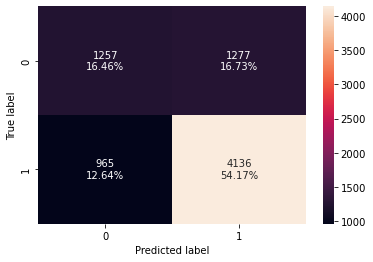

In [32]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

## XGBoost Classifier

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)